In [519]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [73]:
df=pd.read_csv(r'C:\Users\dorot\Downloads\diabetes\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

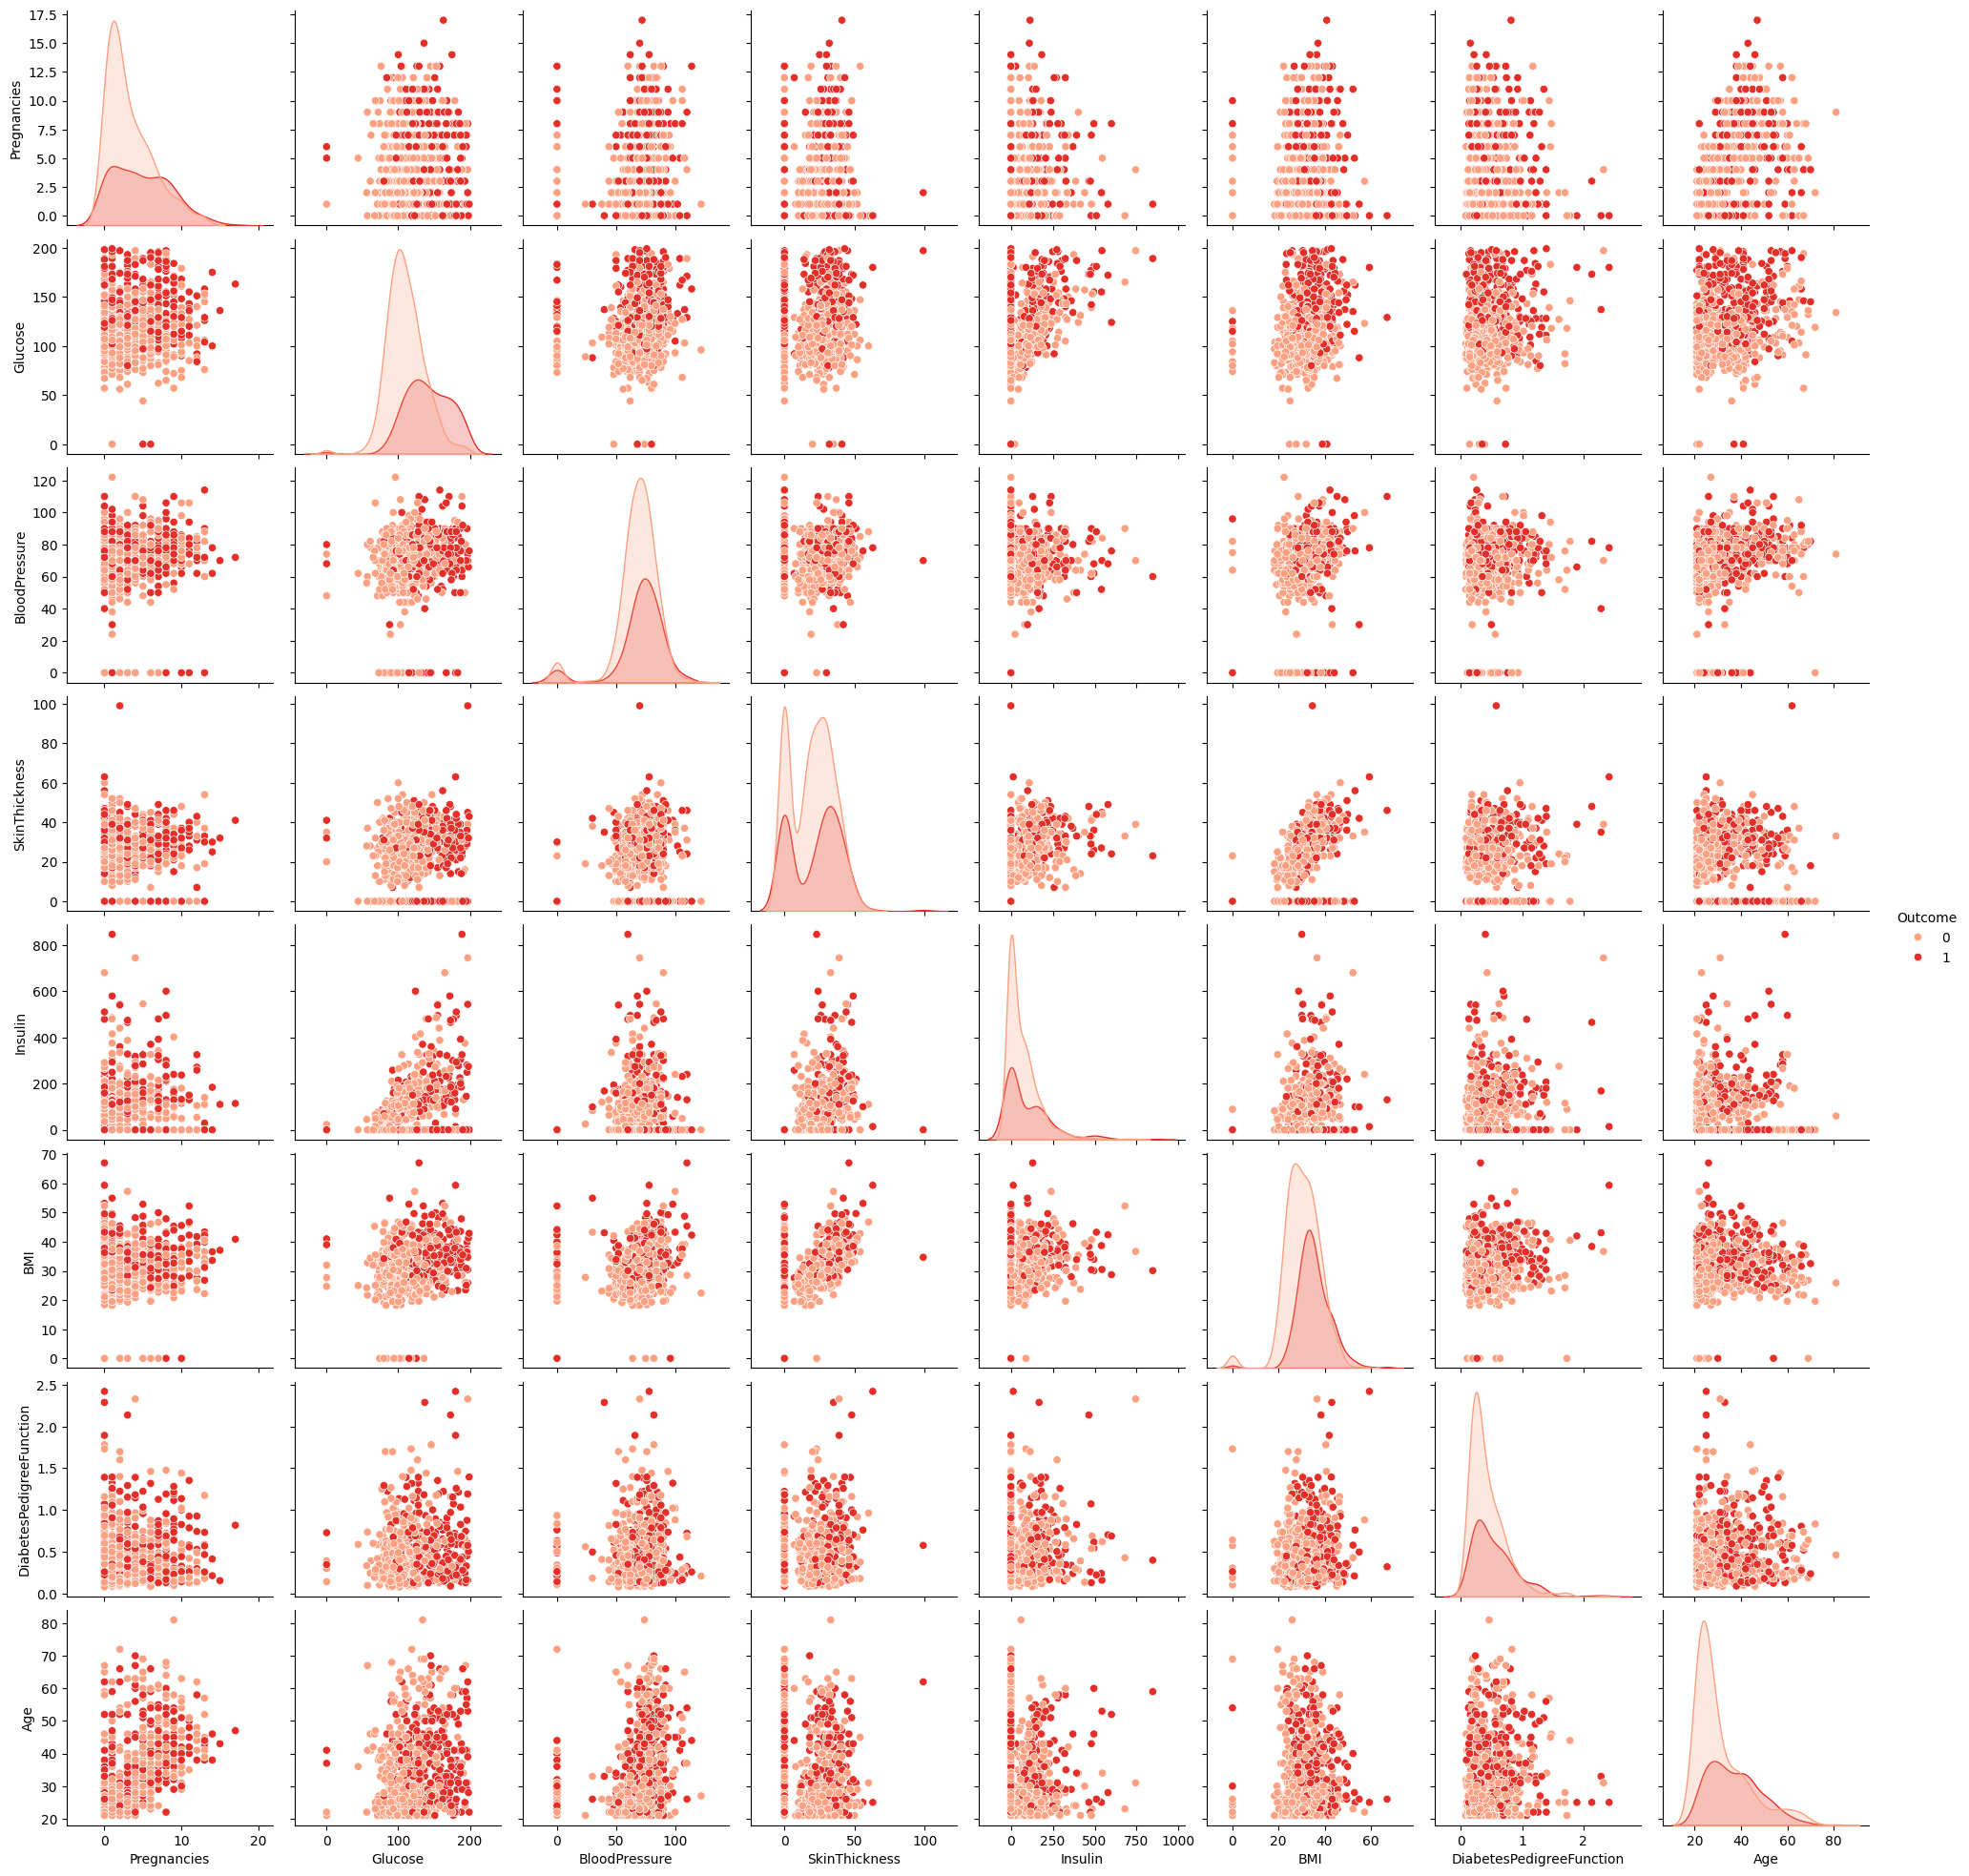

In [482]:
sns.pairplot(data=df,hue='Outcome',palette='Reds')
plt.show()

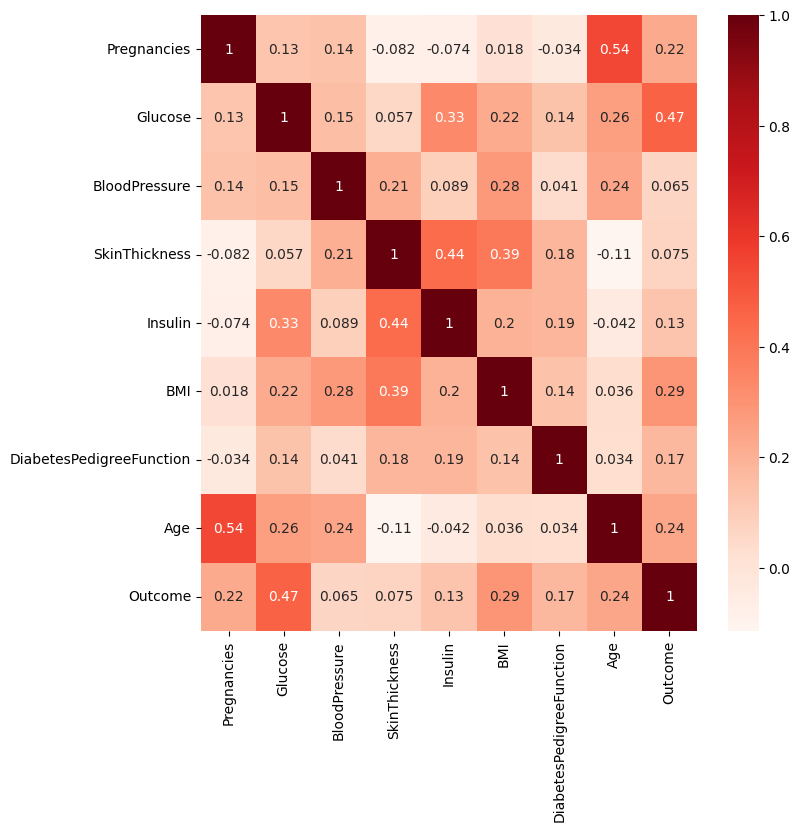

In [497]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='Reds')
plt.show()

<Axes: ylabel='count'>

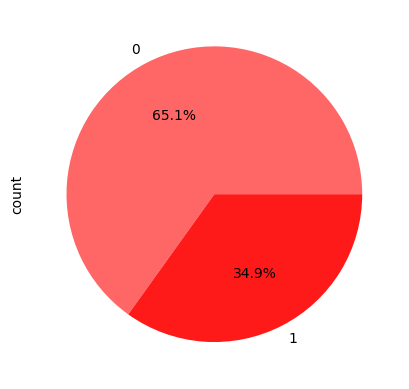

In [517]:
colors = ['#FF6666', '#FF1A1A', '#FF0000']
df['Outcome'].value_counts().plot.pie(autopct="%1.1f%%",colors=colors)

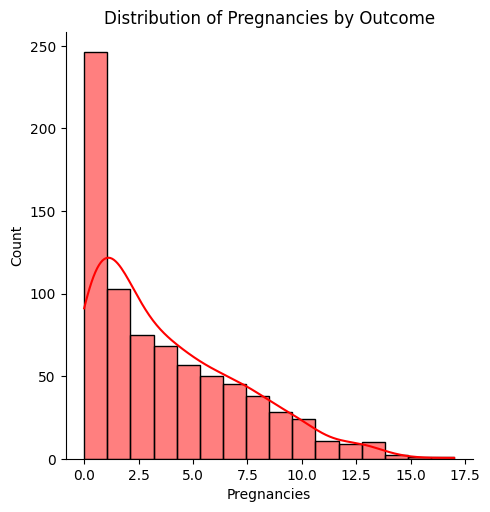

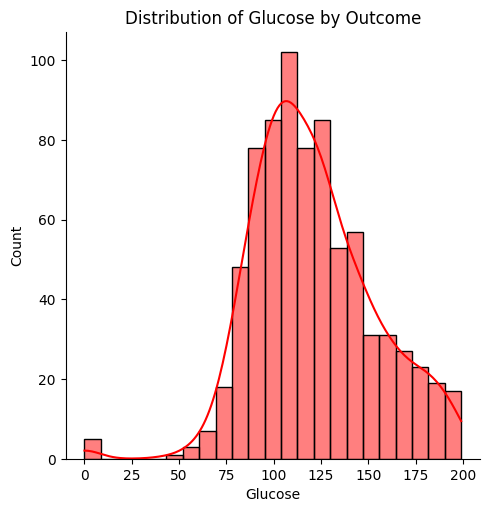

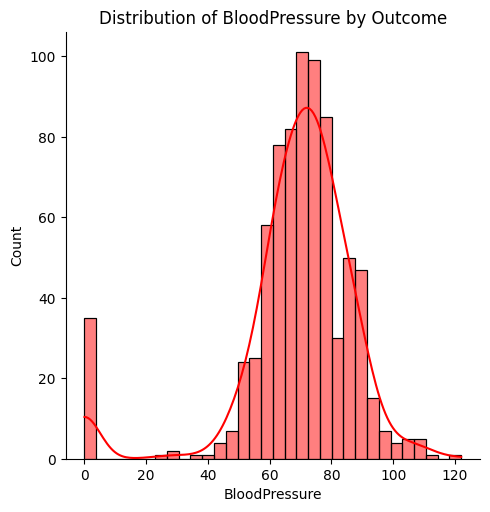

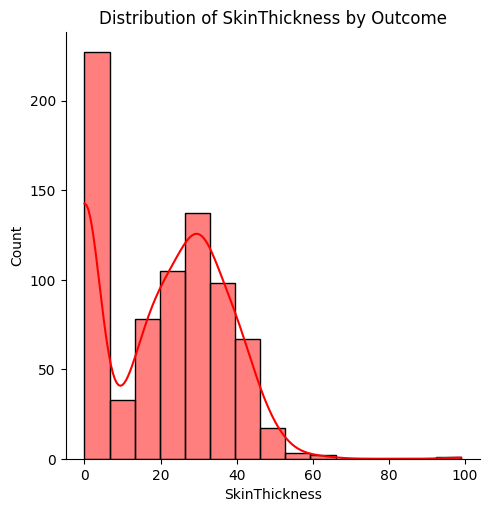

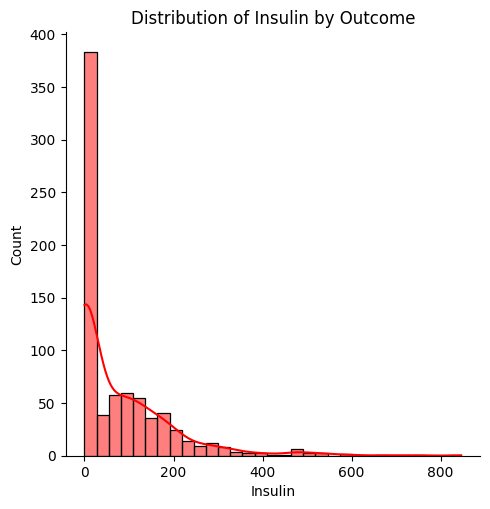

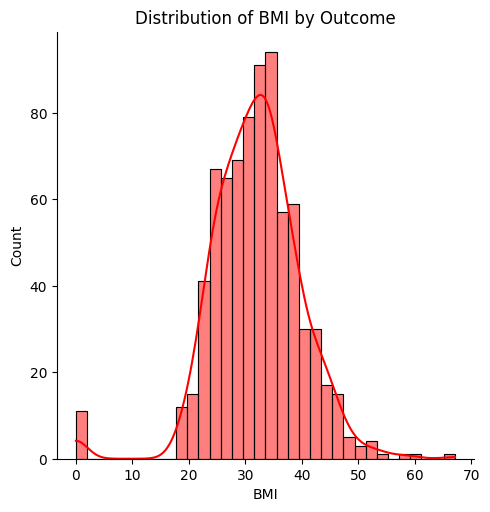

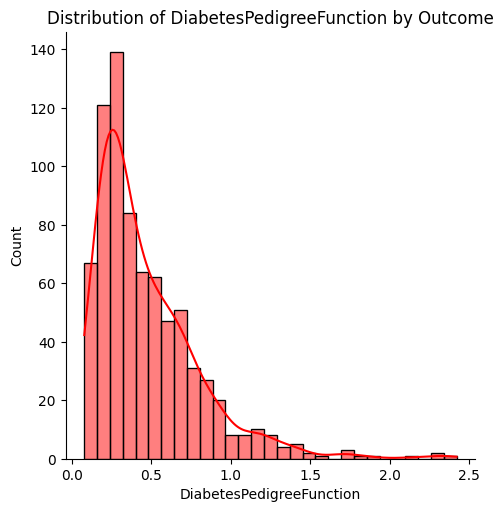

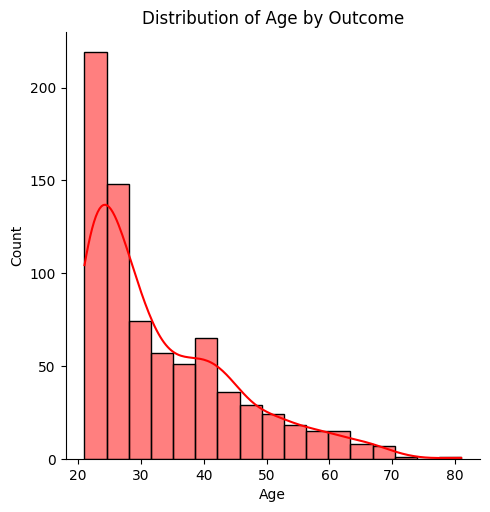

In [31]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Outcome')
numeric_cols
for col in numeric_cols:
    sns.displot(df, x=col, kde=True,fill=True,legend=False,color='red')
    plt.title(f'Distribution of {col} by Outcome')
    plt.show()

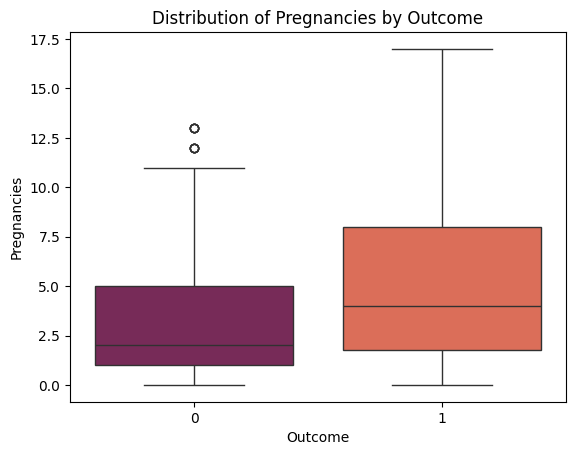

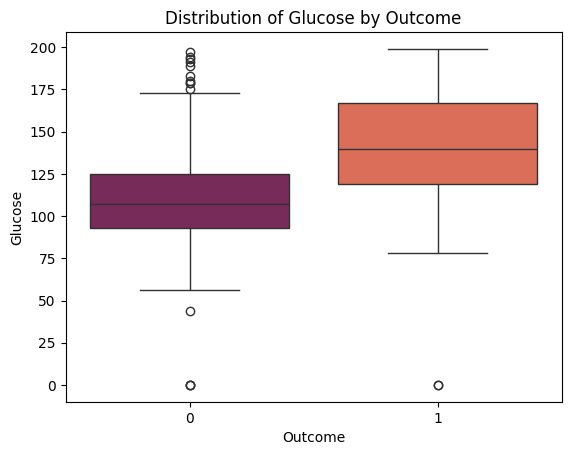

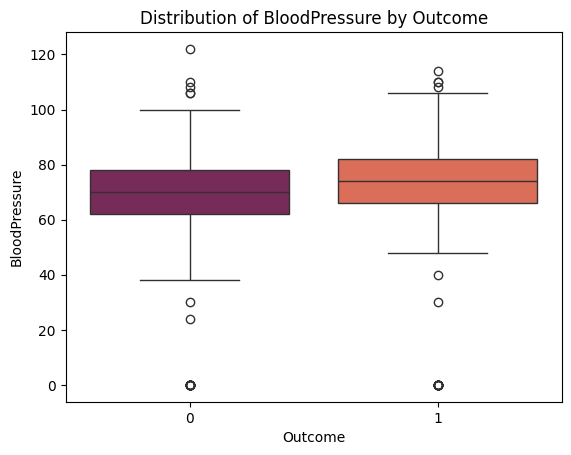

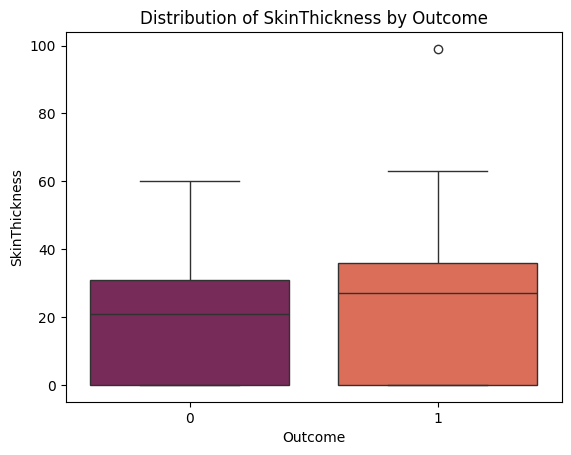

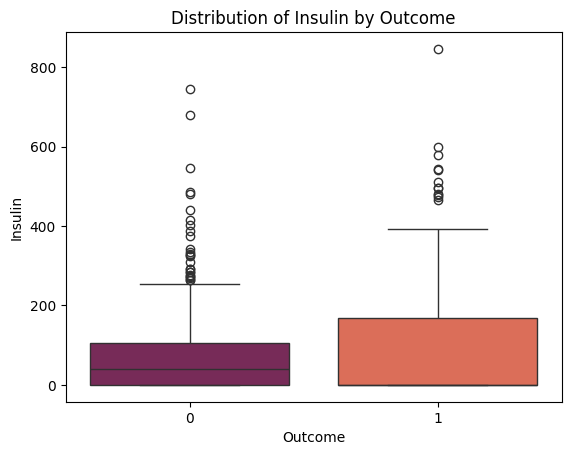

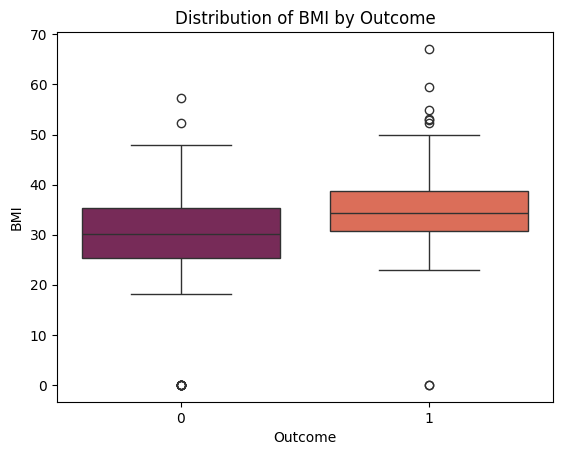

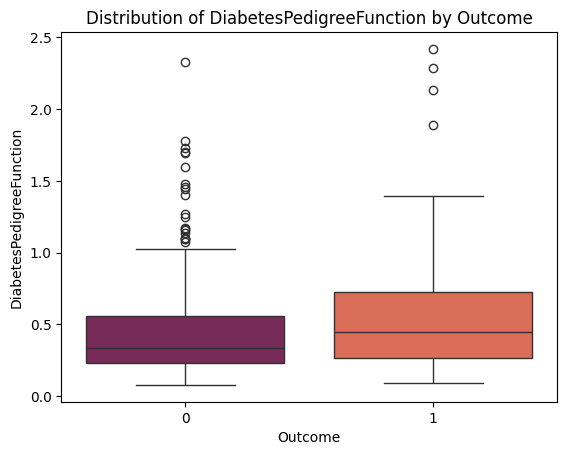

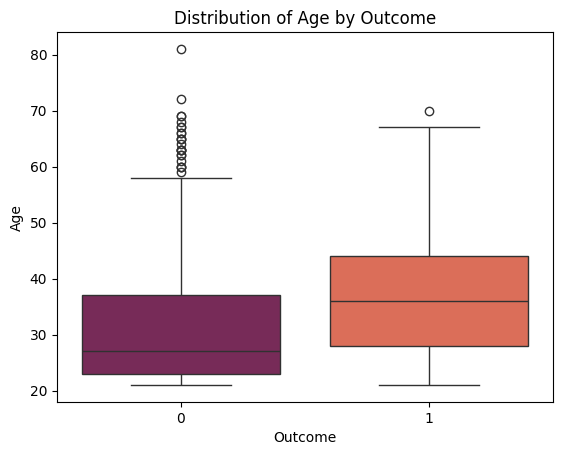

In [35]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop('Outcome')
numeric_cols
for col in numeric_cols:
    sns.boxplot(df, x='Outcome',y=col,hue='Outcome' ,fill=True,legend=False,palette='rocket')
    plt.title(f'Distribution of {col} by Outcome')
    plt.show()

In [311]:
df2=df.copy()

In [313]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [315]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [317]:
columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
df2[columns]=df2[columns].replace(0,np.nan)

In [319]:
df2.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [321]:
def target(x):
    temp = df2[df2[x].notna()]
    temp = temp.groupby('Outcome')[x].median()
    return temp

for i in columns:
    medians = target(i)
    df2.loc[(df['Outcome'] == 0) & (df2[i].isna()), i] = medians[0]
    df2.loc[(df['Outcome'] == 1) & (df2[i].isna()), i] = medians[1]

In [323]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [325]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [327]:
df2.loc[df2['BMI'] < 18.5, 'BMICategory'] = 'Underweight'
df2.loc[(df2['BMI'] >= 18.5) & (df2['BMI'] < 25), 'BMICategory'] = 'NormalWeight'
df2.loc[(df2['BMI'] >= 25) & (df2['BMI'] < 30), 'BMICategory'] = 'OverWeight'
df2.loc[(df2['BMI'] >= 30) & (df2['BMI'] < 35), 'BMICategory'] = 'ObesityI'
df2.loc[(df2['BMI'] >= 35) & (df2['BMI'] < 40), 'BMICategory'] = 'ObesityII'
df2.loc[df2['BMI'] >= 40, 'BMICategory'] = 'ObesityIII'

In [329]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,ObesityI
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,OverWeight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,NormalWeight
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,OverWeight
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,ObesityIII
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0,ObesityI
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0,ObesityII
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0,OverWeight
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1,ObesityI


In [331]:
df2.loc[df2['Glucose'] <= 99, 'GlucoseCategory'] = 'Normal'
df2.loc[(df2['Glucose'] >= 100) & (df2['Glucose'] <= 125), 'GlucoseCategory'] = 'Prediabetes'
df2.loc[df2['Glucose'] >= 126, 'GlucoseCategory'] = 'Diabetes'

In [333]:
df2.loc[df2['Insulin'] < 2, 'InsulinCategory'] = 'Low'
df2.loc[(df2['Insulin'] >= 2) & (df2['Insulin'] < 25), 'InsulinCategory'] = 'Normal'  # Used < 25 instead of <= 25
df2.loc[df2['Insulin'] >= 25, 'InsulinCategory'] = 'High'

In [335]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMICategory,GlucoseCategory,InsulinCategory
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,ObesityI,Diabetes,High
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,OverWeight,Normal,High
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,NormalWeight,Diabetes,High
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,OverWeight,Normal,High
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,ObesityIII,Diabetes,High


In [337]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMICategory',
       'GlucoseCategory', 'InsulinCategory'],
      dtype='object')

In [339]:
categorical_cols = ['InsulinCategory', 'BMICategory', 'GlucoseCategory'] 
encoder = OneHotEncoder(handle_unknown="ignore", dtype=int,sparse_output=False,drop_first=True).set_output(transform="pandas")
encoded_df = encoder.fit_transform(df2[categorical_cols])

In [341]:
df2 = pd.concat([df2, encoded_df], axis=1)

In [343]:
df2.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'BMICategory',
       'GlucoseCategory', 'InsulinCategory', 'InsulinCategory_High',
       'InsulinCategory_Normal', 'BMICategory_NormalWeight',
       'BMICategory_ObesityI', 'BMICategory_ObesityII',
       'BMICategory_ObesityIII', 'BMICategory_OverWeight',
       'BMICategory_Underweight', 'GlucoseCategory_Diabetes',
       'GlucoseCategory_Normal', 'GlucoseCategory_Prediabetes'],
      dtype='object')

In [365]:
category=['InsulinCategory_High',
       'InsulinCategory_Normal', 'BMICategory_NormalWeight',
       'BMICategory_ObesityI', 'BMICategory_ObesityII',
       'BMICategory_ObesityIII', 'BMICategory_OverWeight',
       'BMICategory_Underweight', 'GlucoseCategory_Diabetes',
       'GlucoseCategory_Normal', 'GlucoseCategory_Prediabetes']
category_df = df2[category]

In [367]:
category_df

,InsulinCategory_High,InsulinCategory_Normal,BMICategory_NormalWeight,BMICategory_ObesityI,BMICategory_ObesityII,BMICategory_ObesityIII,BMICategory_OverWeight,BMICategory_Underweight,GlucoseCategory_Diabetes,GlucoseCategory_Normal,GlucoseCategory_Prediabetes
0,1,0,0,1,0,0,0,0,1,0,0
1,1,0,0,0,0,0,1,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,1,0,0,1,0,0,0,0,0,0,1
764,1,0,0,0,1,0,0,0,0,0,1
765,1,0,0,0,0,0,1,0,0,0,1
766,1,0,0,1,0,0,0,0,1,0,0


In [345]:
X = df2.drop(columns=['Outcome', 'BMICategory',
       'GlucoseCategory', 'InsulinCategory', 'InsulinCategory_High',
       'InsulinCategory_Normal', 'BMICategory_NormalWeight',
       'BMICategory_ObesityI', 'BMICategory_ObesityII',
       'BMICategory_ObesityIII', 'BMICategory_OverWeight',
       'BMICategory_Underweight', 'GlucoseCategory_Diabetes',
       'GlucoseCategory_Normal', 'GlucoseCategory_Prediabetes'])
y = df2['Outcome']

In [347]:
col=X.columns
index=X.index

In [349]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [351]:
X=pd.DataFrame(X,columns=col,index=index)

In [369]:
X=pd.concat([X,category_df],axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,InsulinCategory_High,InsulinCategory_Normal,BMICategory_NormalWeight,BMICategory_ObesityI,BMICategory_ObesityII,BMICategory_ObesityIII,BMICategory_OverWeight,BMICategory_Underweight,GlucoseCategory_Diabetes,GlucoseCategory_Normal,GlucoseCategory_Prediabetes
0,0.539221,0.864625,-0.032180,0.665181,0.311604,0.169483,0.468492,1.425995,1,0,0,1,0,0,0,0,1,0,0
1,-1.122584,-1.204727,-0.528124,-0.010112,-0.440843,-0.848549,-0.365061,-0.190672,1,0,0,0,0,0,1,0,0,1,0
2,1.203944,2.014265,-0.693438,0.327535,0.311604,-1.328478,0.604397,-0.105584,1,0,1,0,0,0,0,0,1,0,0
3,-1.122584,-1.073339,-0.528124,-0.685405,-0.536303,-0.630399,-0.920763,-1.041549,1,0,0,0,0,0,1,0,0,1,0
4,0.206860,0.503310,-2.677212,0.665181,0.294758,1.551096,5.484909,-0.020496,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.868666,-0.679177,0.298449,2.128317,0.429525,0.067679,-0.908682,2.532136,1,0,0,1,0,0,0,0,0,0,1
764,-0.790223,0.010607,-0.197495,-0.235210,-0.440843,0.634868,-0.398282,-0.531023,1,0,0,0,1,0,0,0,0,0,1
765,0.206860,-0.022240,-0.032180,-0.685405,-0.334153,-0.906722,-0.685193,-0.275760,1,0,0,0,0,0,1,0,0,0,1
766,-1.122584,0.141994,-1.024067,0.327535,0.311604,-0.339533,-0.371101,1.170732,1,0,0,1,0,0,0,0,1,0,0


In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [397]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Machine Learning

In [537]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

[[96 11]
 [12 35]]
Accuracy: 85.06
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       107
           1       0.76      0.74      0.75        47

    accuracy                           0.85       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.85      0.85      0.85       154



In [427]:
param_grid=[{
    'n_estimators':[100,300],
    'max_depth':[2,4,8,12],
    'min_samples_split':[6,8,10,12],
    'criterion':['entropy','gini'],
    'class_weight': [{0: 1, 1: 2},{0: 1, 1: 3}]
}]

In [429]:
rf=RandomForestClassifier()

In [431]:
grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}],
                          'criterion': ['entropy', 'gini'],
                          'max_depth': [2, 4, 8, 12],
                          'min_samples_split': [6, 8, 10, 12],
                          'n_estimators': [100, 300]}],
             scoring='accuracy')

In [439]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8859522857523657
{'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 100}


In [535]:
rf=RandomForestClassifier(class_weight= {0: 1, 1: 2}, criterion= 'entropy', max_depth= 4, min_samples_split= 8, n_estimators=500)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

[[93 14]
 [ 4 43]]
Accuracy: 88.31
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       107
           1       0.75      0.91      0.83        47

    accuracy                           0.88       154
   macro avg       0.86      0.89      0.87       154
weighted avg       0.90      0.88      0.89       154



In [533]:
rf=RandomForestClassifier(class_weight= {0: 1, 1: 2}, criterion= 'gini', max_depth= 8, min_samples_split= 8, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

[[96 11]
 [ 5 42]]
Accuracy: 89.61
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       107
           1       0.79      0.89      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.90      0.90      0.90       154



In [455]:
param_grid_dtc=[{
    'splitter':['best','random'],
    'max_depth':[2,4,8,12],
    'min_samples_split':[6,8,10,12],
    'criterion':['entropy','gini'],
    'class_weight': [{0: 1, 1: 2},{0: 1, 1: 3}]
}]

In [457]:
dtc=DecisionTreeClassifier()
grid_search=GridSearchCV(dtc,param_grid_dtc,cv=3,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

0.840355491790212
{'class_weight': {0: 1, 1: 3}, 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 6, 'splitter': 'best'}


In [531]:
dtc=DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion= 'gini', max_depth= 4, min_samples_split= 6, splitter= 'best')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

[[91 16]
 [ 5 42]]
Accuracy: 86.36
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       107
           1       0.72      0.89      0.80        47

    accuracy                           0.86       154
   macro avg       0.84      0.87      0.85       154
weighted avg       0.88      0.86      0.87       154



In [523]:
param_grid = {
    'C': [0.1, 0.05,1,10,20,100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
}

svc=SVC(probability=True)

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8306010928961747
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [525]:
svc=SVC(C= 100, gamma= 0.01, kernel= 'rbf')
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))

[[91 16]
 [ 5 42]]
Accuracy: 86.36
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       107
           1       0.72      0.89      0.80        47

    accuracy                           0.86       154
   macro avg       0.84      0.87      0.85       154
weighted avg       0.88      0.86      0.87       154



In [529]:
kn=KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train,y_train)
y_predict=kn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', round(accuracy_score(y_test, y_pred) * 100, 2))
print(classification_report(y_test, y_pred))



[[91 16]
 [ 5 42]]
Accuracy: 86.36
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       107
           1       0.72      0.89      0.80        47

    accuracy                           0.86       154
   macro avg       0.84      0.87      0.85       154
weighted avg       0.88      0.86      0.87       154

